In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

import json
import matplotlib.pyplot as plt
from pywsi.io import WSIReader, read_as_rgb, imshow, read_as_gray, draw_annotation
from pywsi.morphology import TissuePatch

Populating the interactive namespace from numpy and matplotlib


# Visualize a specific region

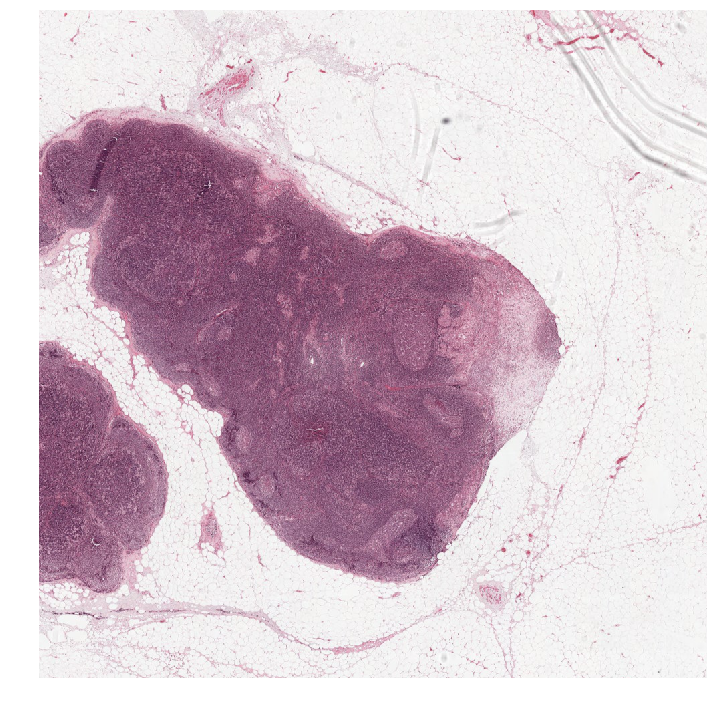

In [2]:
tumor1 = WSIReader('../../../histopath_data/CAMELYON16/training/tumor/tumor_001.tif', 40)
json_filepath = '../../../histopath_data/CAMELYON16/training/lesion_annotations_json/tumor_001.json'

x0 = 51000
y0 = 110000
tumor1.visualize(x0, y0, magnification=1.25, patch_size=1000)


# Visualize the tissue patches (bounding boxes)

In [3]:
tumor1_tissuepatch = TissuePatch(tumor1)


/home/saket/anaconda3/lib/python3.5/site-packages/skimage/color/colorconv.py:269: RuntimeWarning: divide by zero encountered in true_divide
  out_s = delta / out_v
/home/saket/anaconda3/lib/python3.5/site-packages/skimage/color/colorconv.py:275: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = (arr[idx, 1] - arr[idx, 2]) / delta[idx]
/home/saket/anaconda3/lib/python3.5/site-packages/skimage/color/colorconv.py:279: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 2. + (arr[idx, 2] - arr[idx, 0]) / delta[idx]
/home/saket/anaconda3/lib/python3.5/site-packages/skimage/color/colorconv.py:283: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 4. + (arr[idx, 0] - arr[idx, 1]) / delta[idx]


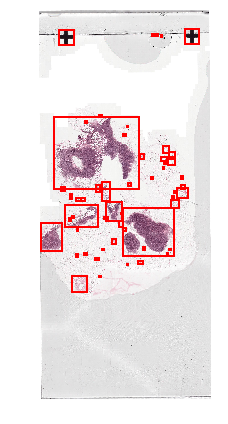

In [4]:
tumor1_tissuepatch.draw_contours()

In [5]:
tumor1_tissuepatch.save_mask('../../../histopath_data/CAMELYON16/training/tissue_masks_level6/')

In [6]:
tumor1.get_annotation_bounding_boxes(json_filepath)

(OrderedDict([('tumor',
               [OrderedDict([('top_left', (69914, 134592)),
                             ('top_right', (72272, 134592)),
                             ('bottom_right', (72272, 131750)),
                             ('bottom_left', (69914, 131750))]),
                OrderedDict([('top_left', (69986, 127842)),
                             ('top_right', (73235, 127842)),
                             ('bottom_right', (73235, 122608)),
                             ('bottom_left', (69986, 122608))])]),
              ('normal', [])]),
 (69914, 122608))

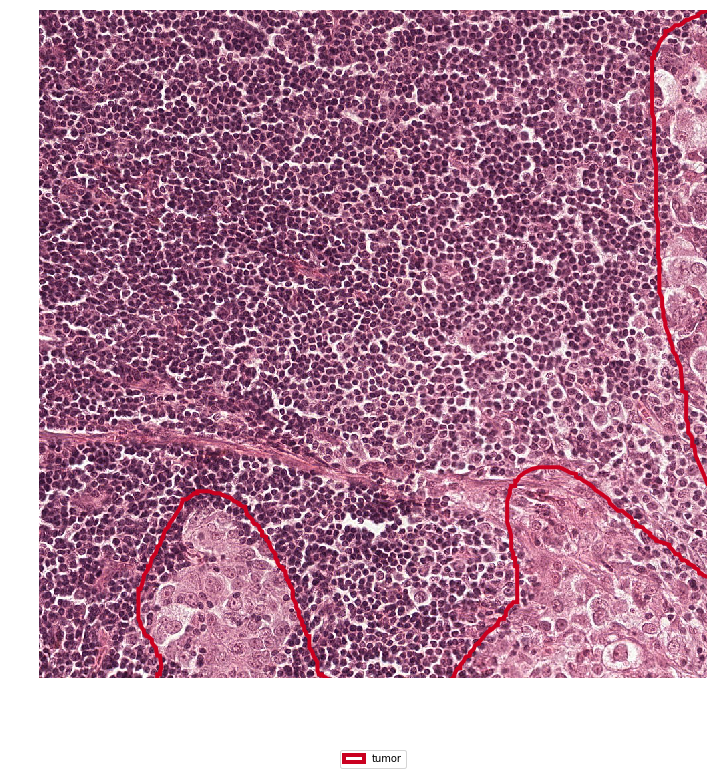

In [7]:
tumor1.autofocus_annotation(json_filepath, level=1, patch_size=1000)

# Visualize the annotated regions (tumor/normal regions in tumor WSIs)

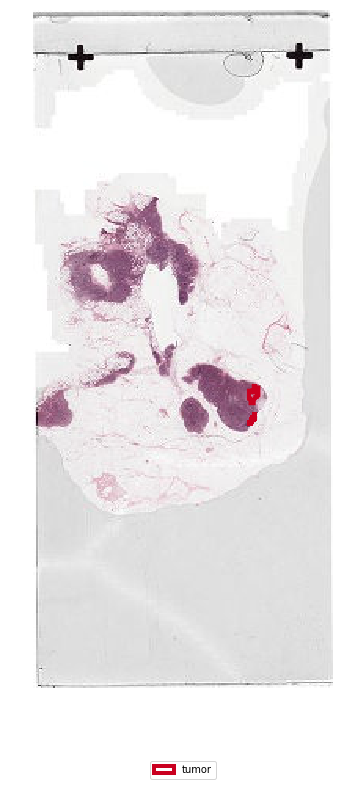

In [8]:
x0=0
y0=0
tumor1.visualize_with_annotation(x0, y0, json_filepath, magnification=tumor1.magnifications[-1])

In [9]:
pols = tumor1.annotation_polygons
for pol in pols:
    print(pol)

Poly((140, 257) ...)
Poly((139, 250) ...)


In [10]:
pol.get_xy()

array([[139., 250.],
       [139., 250.],
       [139., 250.],
       ...,
       [139., 250.],
       [139., 250.],
       [139., 250.]])

# Visualize annotated normal tumor samples at a deeper magnification

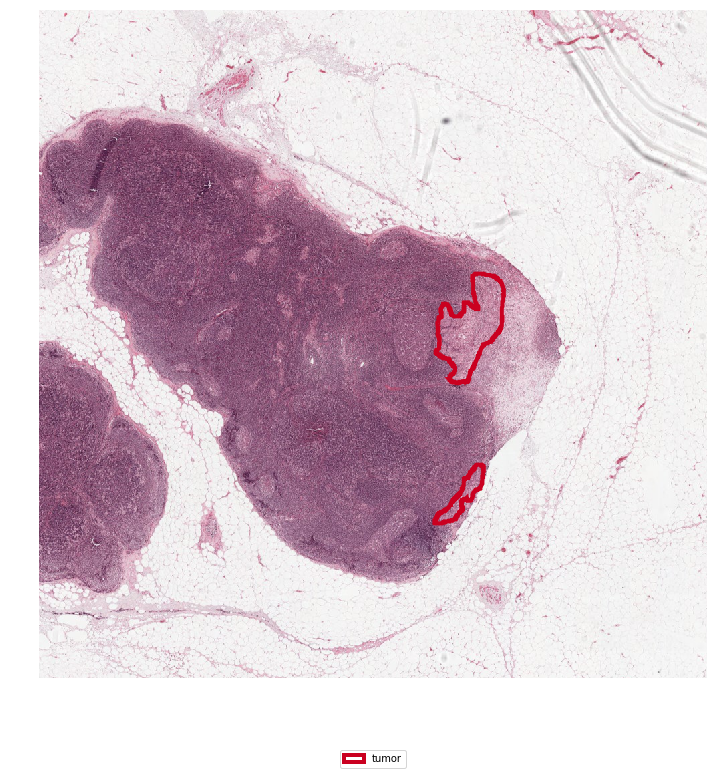

In [11]:
x0 = 51000
y0 = 110000
tumor1.visualize_with_annotation(x0, y0, json_filepath, magnification=1.25, patch_size=1000)


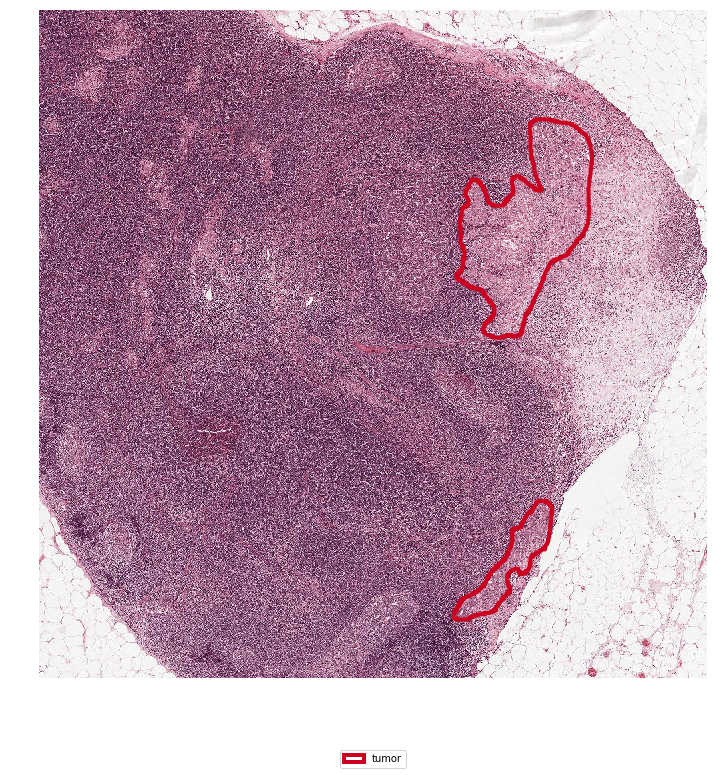

In [12]:
x0 = 60000
y0 = 120000
tumor1.visualize_with_annotation(x0, y0, json_filepath, magnification=2.5, patch_size=1000)


In [13]:
level = 5

patch = tumor1.get_patch_by_level(x0, y0, level=level, patch_size=(256, 256))

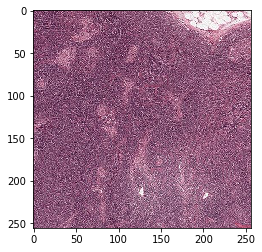

In [14]:
plt.imshow(patch)

In [23]:
grid = tumor1.annotation_masked(json_filepath, level=5)

x len: 21123072
y len: 21123072
shape: (6912, 3056, 3)
grid len: 21123072
points len: 21123072
path len: 856
[False False False ... False False False]


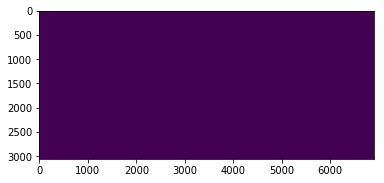

In [24]:
plt.imshow(grid)

In [ ]:
grid = tumor1.annotation_masked(json_filepath, level=5)

In [ ]:
plt.imshow(grid)